In [1]:
"""
Generates data for training
"""
import numpy as np


from qutip.wigner import qfunc
from qutip import destroy, coherent
from qutip.visualization import plot_wigner_fock_distribution
from qutip.wigner import qfunc


import matplotlib.pyplot as plt

import pickle


import glob
from scipy.io import loadmat

from qst_nn.utils import plot_all_fidelities, plot_shaded_fidelities

%load_ext autoreload
%autoreload 2

In [2]:
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {# 'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.labelpad': 1,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

In [3]:
hilbert_size = 32


# Betas can be selected in a grid or randomly in a circle
num_grid = 32
num_points = num_grid*num_grid
beta_max_x = 5
beta_max_y = 5

xvec = np.linspace(-beta_max_x, beta_max_x, num_grid)
yvec = np.linspace(-beta_max_y, beta_max_y, num_grid)

X, Y = np.meshgrid(xvec, yvec)
betas = (X + 1j*Y).ravel()

In [4]:
sigma = 0
cmap = "hot"


def read_file(path):
    """
    Reads a file
    """
    flist = None
    with open(path, 'rb') as f:
        flist = pickle.load(f)
    return flist

datapath = "data/cat-2-0-0/losses-momentum-0.5-l2-0.0002/"

fnames = glob.glob(datapath+"/*")
keys = [name.split(datapath)[1] for name in fnames if "fidelities" in name]
fdict = {}

In [5]:
for key in keys:
    path = datapath + key
    fdict[key] = read_file(path)
    fdict[key] = fdict[key][8:38]

In [6]:
len(fdict[keys[0]])

30

In [7]:
def extend_array(flist, max_iter=10000):
    """
    Extends the array with repeating the last element
    """
    if max_iter == None:
        max_iter = np.max([len(f) for f in flist])

    arr = np.zeros((len(flist), max_iter))

    for i in range(len(flist)):
        last_element = flist[i][-1]
        length_flist = len(flist[i])

        arr[i][:length_flist] = flist[i]
        arr[i][length_flist:] = last_element

    return arr

In [8]:
def get_mean_std_array(arr):
    """
    Obtains the mean of an array over second axis
    """
    return np.mean(arr, axis=0), np.std(arr, axis=0)

In [9]:
fnames = ["iMLE", "cross_entropy", "L1", "L2", "KL",
          "gan_no_l1", "gan_l1_1", "gan_l1_10", "gan_l1_100"]

In [10]:
labels={'fidelities-gan_l1_10': r'$\lambda_{\mathrm{L1}} = 10$',
        'fidelities-imle': "iMLE",
        'fidelities-gan_l1_0': r'$\lambda_{\mathrm{L1}} = 0$',
        'fidelities-cross_entropy': "Cross entropy",
        'fidelities-KL': "KL Divergence",
        'fidelities-L1': r"L1",
        'fidelities-L2': r"L2",
        'fidelities-gan_l1_1': r'$\lambda_{\mathrm{L1}} = 1$',
        'fidelities-gan_l1_100': r'$\lambda_{\mathrm{L1}} = 100$'}

color_dict = {'fidelities-gan_l1_10': 'r',
        'fidelities-iMLE': 'b',
        'fidelities-imle': 'b',
        'fidelities-gan_l1_0': "k",
        'fidelities-cross_entropy': "darkviolet",
        'fidelities-KL': "orange",
        'fidelities-L1':"darkgreen",
        'fidelities-L2':  "deeppink",
        'fidelities-gan_l1_1': "teal",
        'fidelities-gan_l1_100': "brown"}

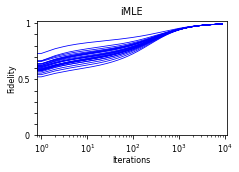

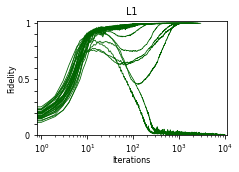

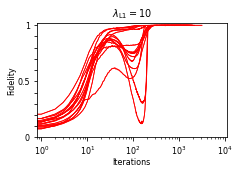

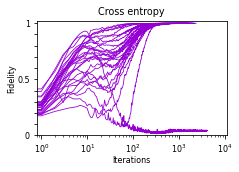

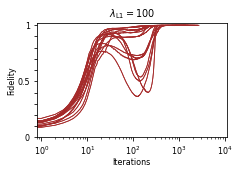

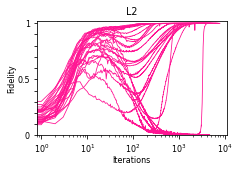

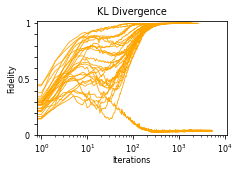

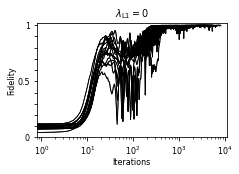

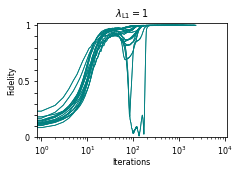

In [11]:
figpath = "figures/"

x = [i for i in range(10000)]
for key in keys:
    # key = keys[idx]
    plot_all_fidelities(fdict[key], x, show_mean=False,
                        color=color_dict[key], title=labels[key])
    # plt.savefig(figpath+"fig-12-cat-{}.pdf".format(key),
    #             bbox_inches = "tight")

# CGAN

/Users/shahnawaz/Dropbox/phd/tomography/manuscript/code/qst-nn/qst_nn/utils.py:599: RuntimeWarning: Mean of empty slice
  return np.nanmean(arr, axis=0), np.nanstd(arr, axis=0)
/Users/shahnawaz/miniconda3/envs/qst-nn/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shahnawaz/Dropbox/phd/tomography/manuscript/code/qst-nn/qst_nn/utils.py:599: RuntimeWarning: Mean of empty slice
  return np.nanmean(arr, axis=0), np.nanstd(arr, axis=0)
/Users/shahnawaz/miniconda3/envs/qst-nn/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/shahnawaz/Dropbox/phd/tomography/manuscript/code/qst-nn/qst_nn/utils.py:599: RuntimeWarning: Mean of empty slice
  return np.nanmean(arr, axis=0), np.nanstd(arr, axis=0)
/Users/shahnawaz/miniconda3/envs/qst-nn/lib

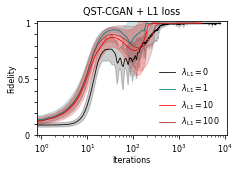

In [12]:
fig, ax = plot_shaded_fidelities(fdict['fidelities-gan_l1_0'], x=x, color=color_dict['fidelities-gan_l1_0'],
                                label=labels['fidelities-gan_l1_0'])

for key in ['fidelities-gan_l1_1', 'fidelities-gan_l1_10', 'fidelities-gan_l1_100']:
    fig, ax = plot_shaded_fidelities(fdict[key], x=x, fig=fig, ax=ax, color=color_dict[key], label=labels[key])
    
plt.legend(frameon=False)
plt.title("QST-CGAN + L1 loss")
plt.show()
# plt.savefig(figpath+"fig-12-gan-cat.pdf", bbox_inches = "tight", pad_inches=0)

In [13]:
bmat = loadmat("data/cat-2-0-0/matlab-data/cat_reconstructed.mat")
pgd_fidelities = bmat['fmatrix']

/Users/shahnawaz/Dropbox/phd/tomography/manuscript/code/qst-nn/qst_nn/utils.py:599: RuntimeWarning: Mean of empty slice
  return np.nanmean(arr, axis=0), np.nanstd(arr, axis=0)
/Users/shahnawaz/miniconda3/envs/qst-nn/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


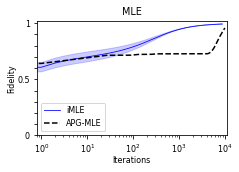

In [14]:
key = 'fidelities-imle'

fig, ax = plot_shaded_fidelities(fdict[key], x=x, color=color_dict[key], label=labels[key])
ax.semilogx(x, np.mean(pgd_fidelities, 0), "--", color="black", label="APG-MLE")
plt.title("MLE")
plt.legend(loc="lower left")
plt.show()
# plt.savefig(figpath+"fig-12-imle-apg-cat.pdf", bbox_inches = "tight", pad_inches=0)

# Show the state

/var/folders/8s/tfpsk_fx609f8w7z__yzz9vh0000gn/T/ipykernel_29328/3069357.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolor(xvec, yvec, x/np.max(x), cmap="hot", vmin=0, vmax=1)


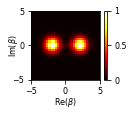

In [15]:
hilbert_size = 32


# Betas can be selected in a grid or randomly in a circle
num_grid = 32
num_points = num_grid*num_grid
beta_max_x = 5
beta_max_y = 5

xvec = np.linspace(-beta_max_x, beta_max_x, num_grid)
yvec = np.linspace(-beta_max_y, beta_max_y, num_grid)

X, Y = np.meshgrid(xvec, yvec)
betas = (X + 1j*Y).ravel()

# betas = [random_alpha(5) for i in range(num_grid*num_grid)]
psi = coherent(32, 2) + coherent(32, -2)
psi = psi.unit()
rho = psi*psi.dag()

x = qfunc(rho, xvec, yvec, g=2)

fig, ax = plt.subplots(1, 1, figsize=(2*fig_width/5, 2*fig_width/5))
im = ax.pcolor(xvec, yvec, x/np.max(x), cmap="hot", vmin=0, vmax=1)
ax.set_aspect("equal")
ax.set_yticks([-5, 0, 5])
ax.set_xlabel(r"Re$(\beta)$", labelpad=0)
ax.set_ylabel(r"Im$(\beta)$", labelpad=-8)
cbar = plt.colorbar(im, fraction=0.046, ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(["0", "0.5", "1"])

# plt.savefig(figpath+"fig-12-cat-data.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()

In [16]:
def psi_cat(hilbert_size, alpha=None, S=None, mu=None):
    """
    Generates a cat state. For a detailed discussion on the definition
    see `Albert, Victor V. et al. “Performance and Structure of Single-Mode Bosonic Codes.” Physical Review A 97.3 (2018) <https://arxiv.org/abs/1708.05010>`_
    and `Ahmed, Shahnawaz et al., “Classification and reconstruction of quantum states with neural networks.” Journal <https://arxiv.org/abs/1708.05010>`_
    
    Args:
    -----
        N (int): Hilbert size dimension.
        alpha (complex64): Complex number determining the amplitude.
        S (int): An integer >= 0 determining the number of coherent states used
                 to generate the cat superposition. S = {0, 1, 2, ...}.
                 corresponds to {2, 4, 6, ...} coherent state superpositions.
        mu (int): An integer 0/1 which generates the logical 0/1 encoding of 
                  a computational state for the cat state.


    Returns:
    -------
        cat (:class:`qutip.Qobj`): Cat state density matrix
    """
    if alpha == None:
        alpha = random_alpha(2, 3)

    if S == None:
        S = np.random.randint(0, 3)

    if mu is None:
        mu = np.random.randint(0, 2)

    kend = 2 * S + 1
    cstates = 0 * (coherent(hilbert_size, 0))

    for k in range(0, int((kend + 1) / 2)):
        sign = 1

        if k >= S:
            sign = (-1) ** int(mu > 0.5)

        prefactor = np.exp(1j * (np.pi / (S + 1)) * k)

        cstates += sign * coherent(hilbert_size, prefactor * alpha * (-((1j) ** mu)))
        cstates += sign * coherent(hilbert_size, -prefactor * alpha * (-((1j) ** mu)))

    return cstates.unit()

a = destroy(hilbert_size)
psi = psi_cat(hilbert_size, alpha=2, S=0, mu=0)
psi2 = a*psi

rho_2 = psi2*psi2.dag()
rho_2 = rho_2.unit()

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fock number', ylabel='Occupation probability'>,
        <AxesSubplot:title={'center':'Wigner function'}, xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>],
       dtype=object))

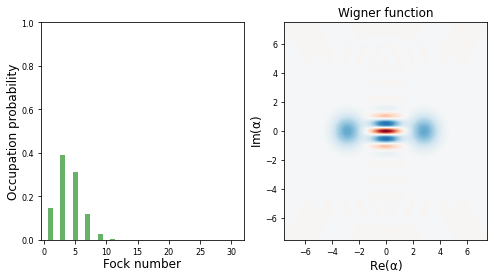

In [17]:
rho2 = a*rho*a.dag()
rho2 = rho2.unit()
plot_wigner_fock_distribution(rho2)

/var/folders/8s/tfpsk_fx609f8w7z__yzz9vh0000gn/T/ipykernel_29328/2910761354.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolor(xvec, yvec, x/np.max(x), cmap="hot", vmin=0, vmax=1)


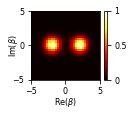

In [18]:
hilbert_size = 32


# Betas can be selected in a grid or randomly in a circle
num_grid = 32
num_points = num_grid*num_grid
beta_max_x = 5
beta_max_y = 5

xvec = np.linspace(-beta_max_x, beta_max_x, num_grid)
yvec = np.linspace(-beta_max_y, beta_max_y, num_grid)

x = qfunc(rho_2/rho_2.tr(), xvec, yvec, g=2)

fig, ax = plt.subplots(1, 1, figsize=(2*fig_width/5, 2*fig_width/5))
im = ax.pcolor(xvec, yvec, x/np.max(x), cmap="hot", vmin=0, vmax=1)
ax.set_aspect("equal")
ax.set_yticks([-5, 0, 5])
ax.set_xlabel(r"Re$(\beta)$", labelpad=0)
ax.set_ylabel(r"Im$(\beta)$", labelpad=-8)
cbar = plt.colorbar(im, fraction=0.046, ticks=[0, 0.5, 1])
cbar.ax.set_yticklabels(["0", "0.5", "1"])

# plt.savefig(figpath+"fig-12-cat-orthogonal-data.pdf", bbox_inches = "tight", pad_inches=0)
plt.show()